In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
iris= fetch_ucirepo(id= 53)
x= iris.data.features
y= iris.data.targets

In [ ]:
def print_report(y_true, ypred, model_name):
  print('-'*30)
  print(model_name)
  print('-'*30)
  print("Confusion Matrix: ")
  print(confusion_matrix(y_true, ypred))

  print('-'*30)
  print(f"Accuracy_score: {accuracy_score(y_true, ypred)}")
  print("-"*30)
  print(f"Recall_score: {recall_score(y_true, ypred, average='macro')}")
  print('-'* 30)
  print(f"Precision_score: {precision_score(y_true, ypred, average='macro')}")
  print('-'* 30)
  print(f"F1_score: {f1_score(y_true, ypred, average='macro')}")
  print('-'*30)
  print("Classification Report: ")
  print(classification_report(y_true, ypred))
  print('-'*30)

In [ ]:
def print_tree(model, df, criterion):
  fig= plt.figure(figsize= (15, 10))
  _= plot_tree(decision_tree= model, feature_names= df.columns, class_names= ["Iris-setosa", "Iris-versicolor", "Iris-virginica"], filled=True)
  fig.savefig(f"iris_decision_tree_with_{criterion}.png")

In [ ]:
df= pd.concat([x, y], axis=1)
pd.set_option('display.max_columns', None)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df.shape)

(150, 5)


In [ ]:
df["class"].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum().sum()

np.int64(3)

In [ ]:
df= df.drop_duplicates()

In [ ]:
df.duplicated().sum().sum()

np.int64(0)

In [ ]:
le= LabelEncoder()
df["class"]= le.fit_transform(df["class"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  147 non-null    float64
 1   sepal width   147 non-null    float64
 2   petal length  147 non-null    float64
 3   petal width   147 non-null    float64
 4   class         147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


In [ ]:
df["class"].value_counts()

,count
class,
1,50
2,49
0,48


In [ ]:
y= df["class"]
x= df.drop(["class"], axis=1)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

In [ ]:
classifier_entropy= DecisionTreeClassifier(criterion= "entropy", max_depth=4)
classifier_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
ypred_entropy= classifier_entropy.predict(x_test)

In [ ]:
print_report(le.inverse_transform(y_test), le.inverse_transform(ypred_entropy), "Decision Tree with Entropy")

------------------------------
Decision Tree with Entropy
------------------------------
Confusion Matrix: 
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
------------------------------
Accuracy_score: 0.9666666666666667
------------------------------
Recall_score: 0.9666666666666667
------------------------------
Precision_score: 0.9666666666666667
------------------------------
F1_score: 0.9649122807017543
------------------------------
Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

------------------------------


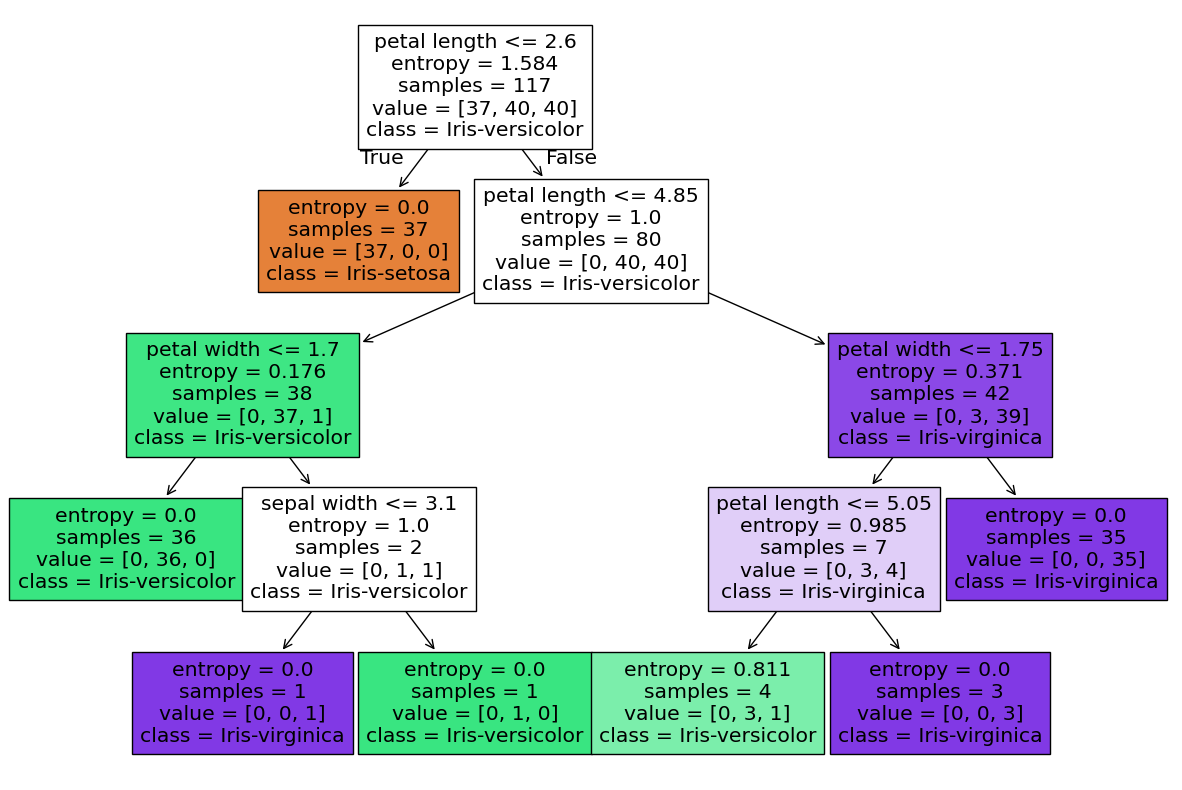

In [ ]:
print_tree(classifier_entropy, x, "entropy")

In [ ]:
classifier_gini= DecisionTreeClassifier(criterion= "gini", max_depth= 4)
classifier_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
ypred_gini= classifier_gini.predict(x_test)

In [ ]:
print_report(le.inverse_transform(y_test), le.inverse_transform(ypred_gini), "Decision Tree with Gini")

------------------------------
Decision Tree with Gini
------------------------------
Confusion Matrix: 
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
------------------------------
Accuracy_score: 0.9333333333333333
------------------------------
Recall_score: 0.9296296296296296
------------------------------
Precision_score: 0.9296296296296296
------------------------------
F1_score: 0.9296296296296296
------------------------------
Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

------------------------------


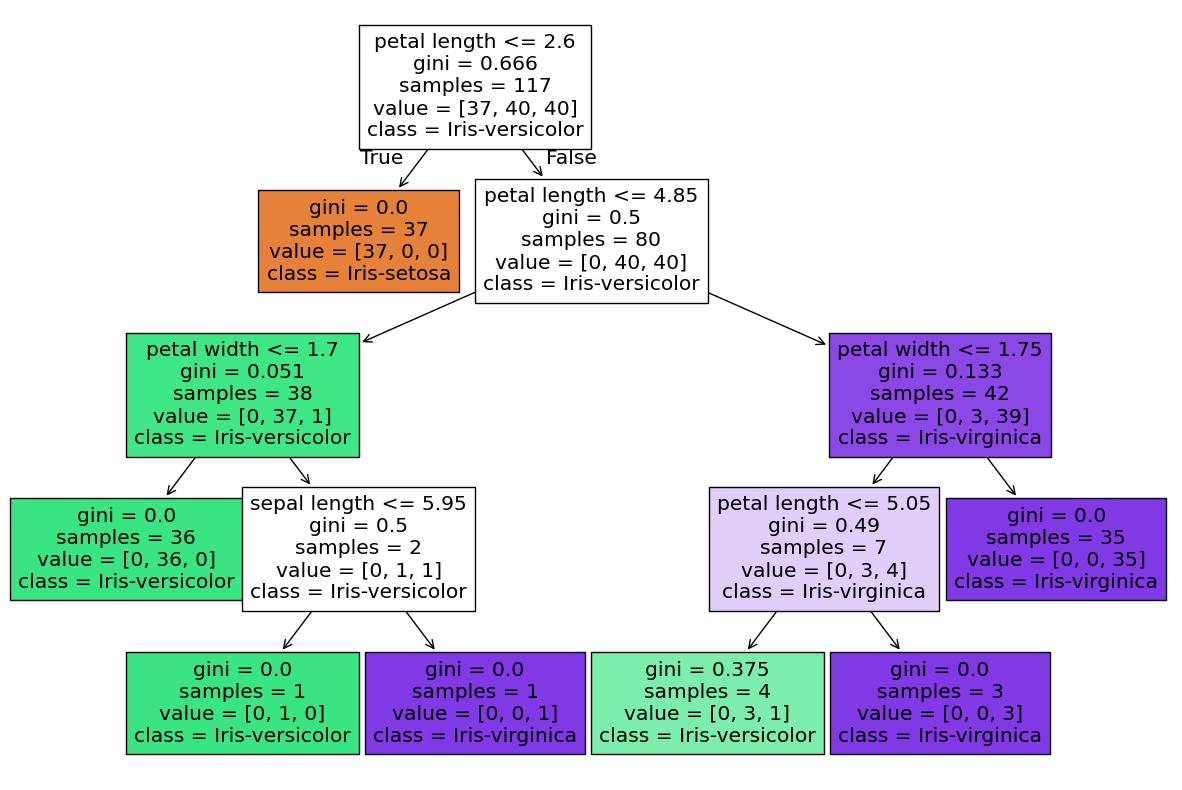

In [ ]:
print_tree(classifier_gini, x, "gini")